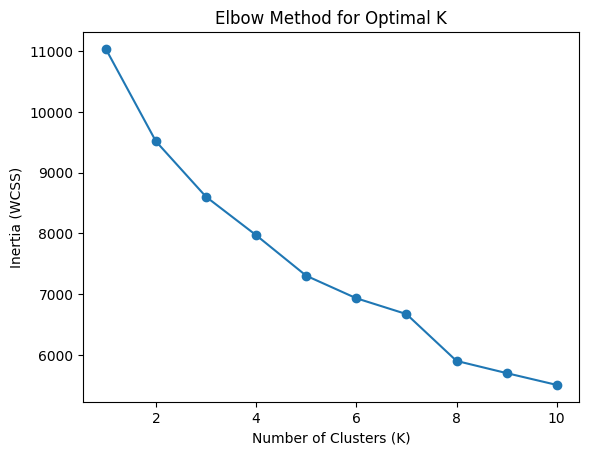

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score
# load 
data = pd.read_csv("cleaned_heart_data.csv")
X=data.drop(columns=['num'])
X_selected = np.load("X_selected.npy",allow_pickle=True)
final_features = np.load("final_feature.npy", allow_pickle=True)
Y = np.load("Y.npy")
#scale the X_selected
scaler=StandardScaler()
X_selected_scaler=scaler.fit_transform(X_selected)
# elbow method to determine the K
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected_scaler)   
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()


     thalch       age   oldpeak      chol  sex_Male  cp_non-anginal       fbs  \
0  0.489727  1.007386  1.381474 -0.212194  0.516931       -0.533775  2.380476   
1 -1.181478  1.432034  0.606678  0.807376  0.516931       -0.533775 -0.420084   
2 -0.345875  1.432034  1.672023 -0.289143  0.516931       -0.533775 -0.420084   
3  1.961979 -1.752828  2.543668  0.114838  0.516931        1.873447 -0.420084   
4  1.365120 -1.328180  0.509828 -0.770073 -1.934494       -0.533775 -0.420084   

   cp_typical angina  restecg_st-t abnormality     exang  slope_upsloping  \
0           4.358899                 -0.491493 -0.760292        -0.532094   
1          -0.229416                 -0.491493  1.315283        -0.532094   
2          -0.229416                 -0.491493  1.315283        -0.532094   
3          -0.229416                 -0.491493 -0.760292        -0.532094   
4          -0.229416                 -0.491493 -0.760292         1.879367   

   cp_atypical angina  Cluster  
0           -0.48

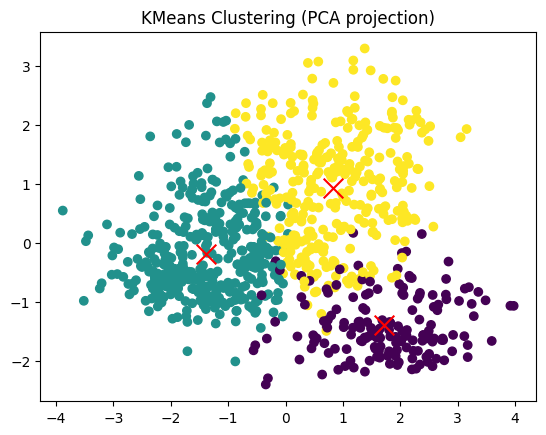

In [65]:
#  K
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_selected_scaler)   
labels = kmeans.labels_
# turning into dataset
X_selected_scaler_df = pd.DataFrame(X_selected_scaler, columns=final_features)
X_selected_scaler_df["Cluster"] = labels
print(X_selected_scaler_df.head())
#PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_scaler)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1], 
            marker='x', s=200, color='red')
plt.title("KMeans Clustering (PCA projection)")
plt.show()



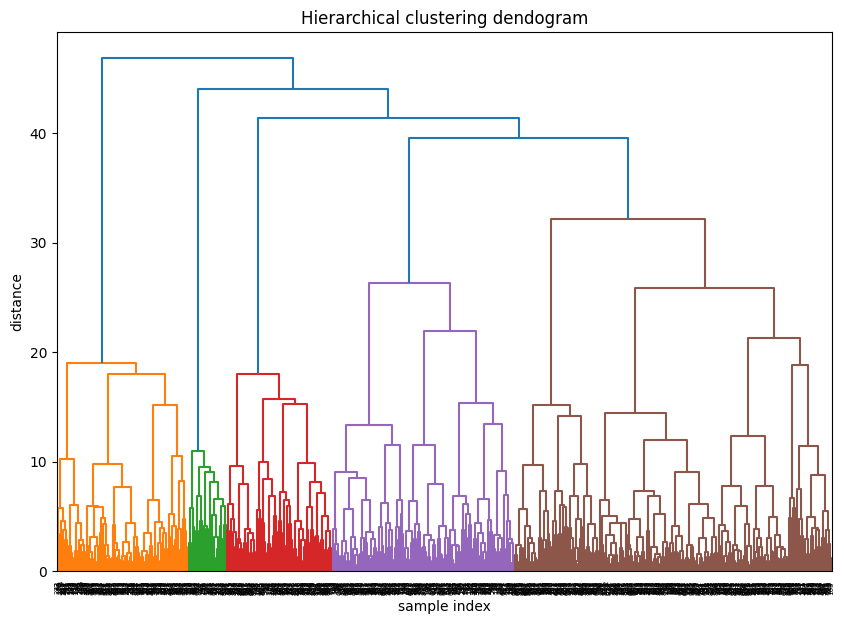

In [66]:
#preform hierachical clustering
linked=linkage(X_selected_scaler,'ward')

# plot dendogram
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title('Hierarchical clustering dendogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

In [67]:
#compare clusters with true labels
#crosstab method
clusters = labels
comparison_df=pd.DataFrame({'Clusters':clusters , 'disease':Y})
crosstab=pd.crosstab(comparison_df['Clusters'],comparison_df['disease'])
print(crosstab)

disease     0    1
Clusters          
0         150   20
1          56  356
2         205  133


In [68]:
#ARI
ari = adjusted_rand_score(Y, clusters)
print("Adjusted Rand Index:", ari)
#NMI
nmi = normalized_mutual_info_score(Y, clusters)
print("Normalized Mutual Information:", nmi)
# after comparing the K for better results i concluded that i will choose K=2 for better results

Adjusted Rand Index: 0.2546954853737746
Normalized Mutual Information: 0.2272786306454241
